# Correlation

Correlation and covariance are two important concepts in statistics. They are used to measure the relationship between two variables.

- **Covariance** values range: $(-\infty, +\infty)$
- **Correlation** values range: $[-1, 1]$

### Linear Relationship

- *Covariance* and *Correlation* only account for linear relationships.
- In other words, if we have a relationship that is non-linear, such measures might still turn out to be zero.

##### Setup

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.dropna(inplace=True)

#### Covariance

If we have two vectors of the same length, $x$ and $y$, where each element of $x$ is paired with the corresponding element of $y$, **covariance** provides a measure of how related the variables are to each other:
$$ \text{cov}(x, y) = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y}) }{n} \in (-\infty, +\infty)$$

<Axes: xlabel='sepal_length', ylabel='petal_length'>

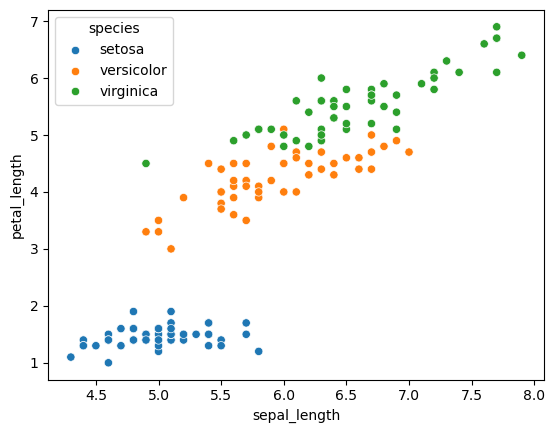

In [4]:
sns.scatterplot(x=iris['sepal_length'], y=iris['petal_length'], hue='species', data=iris)

In [5]:
x=iris['sepal_length']
y=iris['petal_length']
covariance = np.cov(x, y)
covariance

array([[0.68569351, 1.27431544],
       [1.27431544, 3.11627785]])

#### Pearson's Correlation Coefficient

- A drawback of covariance is that it confounds the relative scale of two variables with a measure of the variables' relatedness.

- **Correlation** is the covariance normalized by the product of the standard deviations. Hence, its range is between: $-1$ to $1$.

The correlation coefficient (developed by Karl Pearson in the 20th c. though known in the 19th c.) is often denoted with $r$ or $\rho$ and is defined by: 
$$ \rho_{x,y} = \frac{\text{cov}(x,y)}{\sigma_x \sigma_y} \in [-1, 1]$$

Recall the *Standard Deviation* of $x$, ($\sigma_x$), is square root of the *Variance* (the average squared distance between each point and the mean $\bar x$):

$$ \sigma_x = \sqrt{\frac{\sum_{i=1}^n (x_i-\bar{x})^2}{n}} $$

Likewise, for $y$:


$$ \sigma_y = \sqrt{\frac{\sum_{i=1}^n (y_i-\bar{y})^2}{n}} $$

#### High Correlation

In [11]:
from scipy import stats

result = stats.pearsonr(iris['sepal_length'], iris['petal_length'])
print(f"Pearson correlation coefficient: {result.correlation:.2f}")

Pearson correlation coefficient: 0.87


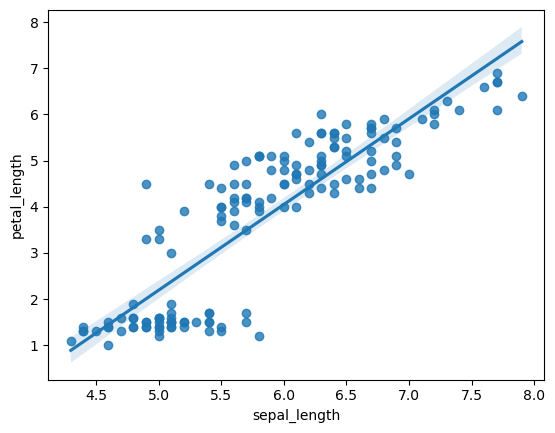

In [22]:
sns.regplot(data=iris, x="sepal_length", y="petal_length");

#### Low Correlation

In [13]:
from scipy import stats

result = stats.pearsonr(iris['sepal_length'], iris['sepal_width'])
print(f"Pearson correlation coefficient: {result.correlation:.2f}")

Pearson correlation coefficient: -0.12


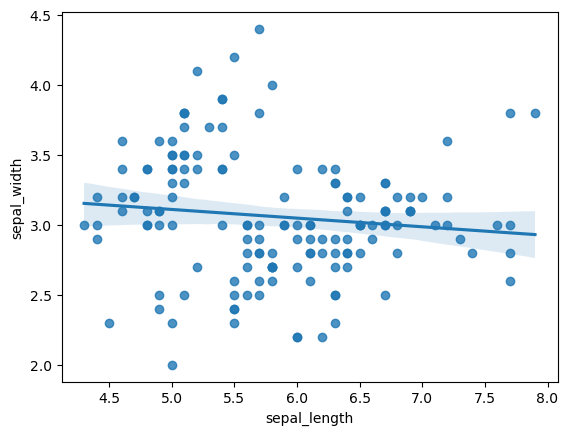

In [18]:
sns.regplot(data=iris, x="sepal_length", y="sepal_width");

# Correlation Doesn't Imply Causation

Source for example images: https://www.tylervigen.com/spurious-correlations

#### Example:

<img src="https://www.tylervigen.com/spurious/correlation/image/5904_cheddar-cheese-consumption_correlates-with_solar-power-generated-in-haiti.svg">

#### Example:

<img src="https://www.tylervigen.com/spurious/correlation/image/1070_google-searches-for-zombies_correlates-with_the-number-of-real-estate-agents-in-north-dakota.svg">


#### Example:

<img src="https://www.tylervigen.com/spurious/correlation/image/1689_bachelors-degrees-awarded-in-liberal-arts_correlates-with_the-number-of-pediatricians-in-massachusetts.svg">


#### In brief, three criteria are required for inferring causal relationships: 

To prove something causes something else (like medicine curing a disease), we need to show 3 things:

1. **Cause comes first:** The change in "the cause" (like taking medicine) must happen before the change in "the effect" (getting better).
2. **They're linked:** There must be a connection between "the cause" and "the effect." The stronger the connection, the more likely they're truly linked.
3. **No other culprits:** We need to be sure nothing else is making "the effect" happen (like getting plenty of rest).

**The best way to show all this is with a special kind of experiment:**

* We randomly split people into groups, like giving some medicine and others a fake pill.
* We don't know who gets what (double-blind).
* We track who gets better.